<div id='toc'></div>

# Detector efficiency

In [1]:
TFile file("Events_npip.root");

In [2]:
//genral definition to use Tree
#define PI 3.14159265
TTree* tree =(TTree*) file.Get("events");
Int_t nTracks, detectors[100];
Double_t theta[100],clusterEnergy[100],vetoEnergy[100],phi[100];
Float_t elab[2],ebeam,dircos[2][3],plab[2];


//TH1F *h1 = new TH1F("measured_theta","measures_theta", 36,0,180); // energy of all measured events

TH1F *h_true_thetapion =new TH1F("true_theta pion","true_theta pion", 18,0,180);


tree->SetBranchAddress("nTracks",&nTracks);
tree->SetBranchAddress("detectors",detectors);
tree->SetBranchAddress("theta",theta);
tree->SetBranchAddress("phi",phi);
tree->SetBranchAddress("clusterEnergy",clusterEnergy);
tree->SetBranchAddress("vetoEnergy",vetoEnergy);
tree->SetBranchAddress("elab",elab);
tree->SetBranchAddress("plab",plab);

tree->SetBranchAddress("ebeam",&ebeam);
tree->SetBranchAddress("dircos",dircos);


for(int i =0,N= tree->GetEntries(); i< N; ++i){
    tree->GetEntry(i);
    h_true_thetapion->Fill(acos(dircos[1][2])*(180/3.14159265));

     
}

In [6]:


TH1F *h_pion =new TH1F("proton","proton", 100,0,1500);

TH1F *h_thetap =new TH1F("proton theta","proton theta", 18,0,180);





for(int i =0,N= tree->GetEntries(); i< N; ++i){
    tree->GetEntry(i);
        if(nTracks==2){
        int pion = 1;
        int neut = 0;
            if(vetoEnergy[0]>vetoEnergy[1]){
                pion = 0;
                neut = 1;
            }
            else if(vetoEnergy[0]<vetoEnergy[1]){
                pion = 1;
                neut = 0;
            }
            else if(vetoEnergy[0]==0 && vetoEnergy[1]==0){
                continue; //this to cut the events when both tracks have VetoEnergy ==0
            }
 if (  detectors[pion]==7 or detectors[pion]==3 or detectors[pion]==5 or detectors[pion]==6 or detectors[pion]==40 ){ //       
     if (vetoEnergy[pion]>0.7){ 

        if(detectors[neut]==1){
                                     
          if(abs(phi[neut])+abs(phi[pion])<=(180+1.5*5.99)){
                if( abs(phi[neut])+abs(phi[pion])>=(180-1.5*5.99)){
                                         
                    auto diff_theta=acos(dircos[0][2])*(180/3.14159265)-theta[neut];
                    if (diff_theta<=2*4.95){
                    if(diff_theta>=-2*4.95){
    
                    h_thetap->Fill(theta[pion]);
                                            
                                        
                                                 }
                                             }
                                        }  
                                 
                                    }                                 
                                }
                     
                            
                        }
     
            

    
    
                }
            }
        }

    

## total detetcor efficiency 

### efficiency as a function of the polar angle for the proton

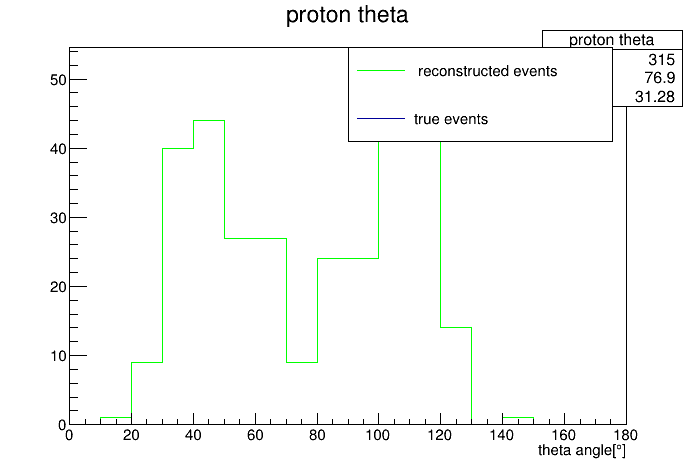

In [9]:

h_thetap->SetLineColor(kGreen);
h_thetap->GetXaxis()->SetTitle("theta angle[#circ]"); 
h_thetap->GetYaxis()->SetTitle(" ");
h_true_thetapion->SetTitle("pion polar angle");
h_true_thetapion->SetTitle("");
TCanvas* c= new TCanvas();
h_true_thetapion->GetXaxis()->SetTitle(" #theta angle[#circ]"); 

h_thetap->Draw("");



c->Draw();
   auto legend = new TLegend(0.5,0.7,0.88,0.9);
  // legend->SetHeader("","C"); // option "C" allows to center the header
   legend->AddEntry(h_thetap," reconstructed events","l");
   

   legend->Draw();


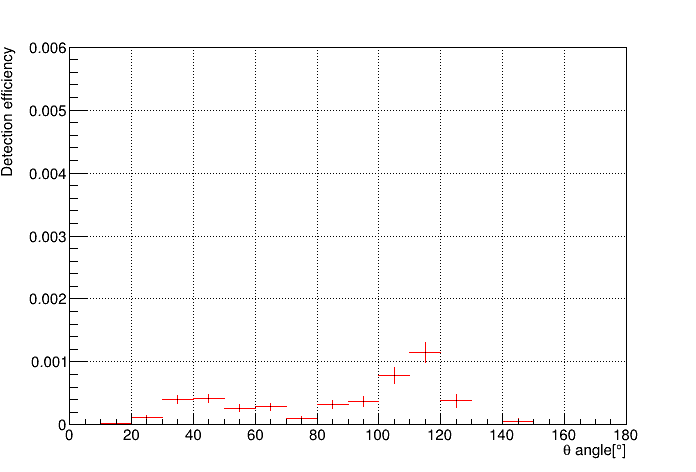

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: jpg file ratio_thetapion.jpg has been created


In [14]:
h_thetap->Sumw2();
gStyle->SetOptStat(0);
auto div_thetap = new TH1F(*h_thetap);
 div_thetap->Divide(h_true_thetapion);
TCanvas c5;
div_thetap->GetXaxis()->SetTitle(" #theta angle[#circ]"); 
div_thetap->GetYaxis()->SetTitle(" Detection efficiency"); 
div_thetap->SetLineColor(kRed);
div_thetap->GetYaxis()->SetRangeUser(0,0.006);
div_thetap->SetTitle("total detector acceptance vs. theta angle proton lab");
div_thetap->SetTitle("");
div_thetap->Draw();
c5.SetGrid();
c5.Draw();
c5.SaveAs("ratio_thetapion.jpg")